In [363]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
%matplotlib inline

conn = mysql.connector.connect(user='hbs-student', password='super-secure-password?',
                              host='hbs-ds-060120.c1doesqrid0e.us-east-1.rds.amazonaws.com',
                              database='movies')

In [134]:
df = pd.read_sql_query('''
    SELECT director,production_budget,domestic_gross,worldwide_gross FROM movies.rt_movie_info
join rt_imdb_link
on rt_movie_info.id = rt_imdb_link.rtid
join tn_movie_budgets
on rt_imdb_link.title = tn_movie_budgets.movie
''', conn)

OperationalError: MySQL Connection not available.

In [135]:
df

,director,production_budget,domestic_gross,worldwide_gross
0,Paul Bogart,120000000.0,56117548.0,167849187.0
1,Paul Bogart,87500000.0,154696080.0,333132750.0
2,,27000000.0,4476235.0,16566235.0
3,William Friedkin,145000000.0,68671925.0,121671925.0
4,Taylor Hackford,110000000.0,47398413.0,218853353.0
5,,60000000.0,26873932.0,71073932.0
6,George Hickenlooper,80000000.0,128200012.0,260700012.0
7,Robert Ramirez,150000000.0,206459076.0,475825484.0
8,Jake Kasdan,45000000.0,82931301.0,155931301.0
9,Lynn Shelton,150000000.0,205343774.0,359142722.0


In [136]:
df['production_budget']=df['production_budget'].str.replace(',','')
df['production_budget']=df['production_budget'].str.replace('$','')

AttributeError: Can only use .str accessor with string values!

In [137]:
df['domestic_gross']=df['domestic_gross'].str.replace(',','')
df['domestic_gross']=df['domestic_gross'].str.replace('$','')

AttributeError: Can only use .str accessor with string values!

In [138]:
df['worldwide_gross']=df['worldwide_gross'].str.replace(',','')
df['worldwide_gross']=df['worldwide_gross'].str.replace('$','')

AttributeError: Can only use .str accessor with string values!

In [139]:
df["production_budget"] = df.production_budget.astype(float)
df["domestic_gross"] = df.domestic_gross.astype(float)
df["worldwide_gross"] = df.worldwide_gross.astype(float)

In [140]:
df

,director,production_budget,domestic_gross,worldwide_gross
0,Paul Bogart,120000000.0,56117548.0,167849187.0
1,Paul Bogart,87500000.0,154696080.0,333132750.0
2,,27000000.0,4476235.0,16566235.0
3,William Friedkin,145000000.0,68671925.0,121671925.0
4,Taylor Hackford,110000000.0,47398413.0,218853353.0
5,,60000000.0,26873932.0,71073932.0
6,George Hickenlooper,80000000.0,128200012.0,260700012.0
7,Robert Ramirez,150000000.0,206459076.0,475825484.0
8,Jake Kasdan,45000000.0,82931301.0,155931301.0
9,Lynn Shelton,150000000.0,205343774.0,359142722.0


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   director           28 non-null     object 
 1   production_budget  28 non-null     float64
 2   domestic_gross     28 non-null     float64
 3   worldwide_gross    28 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.0+ KB


In [142]:
gross_by_director = df.groupby('director').sum().sort_values('worldwide_gross',ascending=False)

In [143]:
gross_by_director

,production_budget,domestic_gross,worldwide_gross
director,,,
Adrian Lyne,132000000.0,234280354.0,606836535.0
Paul Bogart,207500000.0,210813628.0,500981937.0
Robert Ramirez,150000000.0,206459076.0,475825484.0
Lynn Shelton,150000000.0,205343774.0,359142722.0
,143000000.0,144357047.0,285647047.0
George Hickenlooper,80000000.0,128200012.0,260700012.0
Taylor Hackford,110000000.0,47398413.0,218853353.0
Terry Gilliam,82000000.0,158119460.0,191558505.0
Melvin Frank,142000000.0,51535741.0,178735741.0


Text(0, 0.5, 'Worldwide box office gross ($M)')

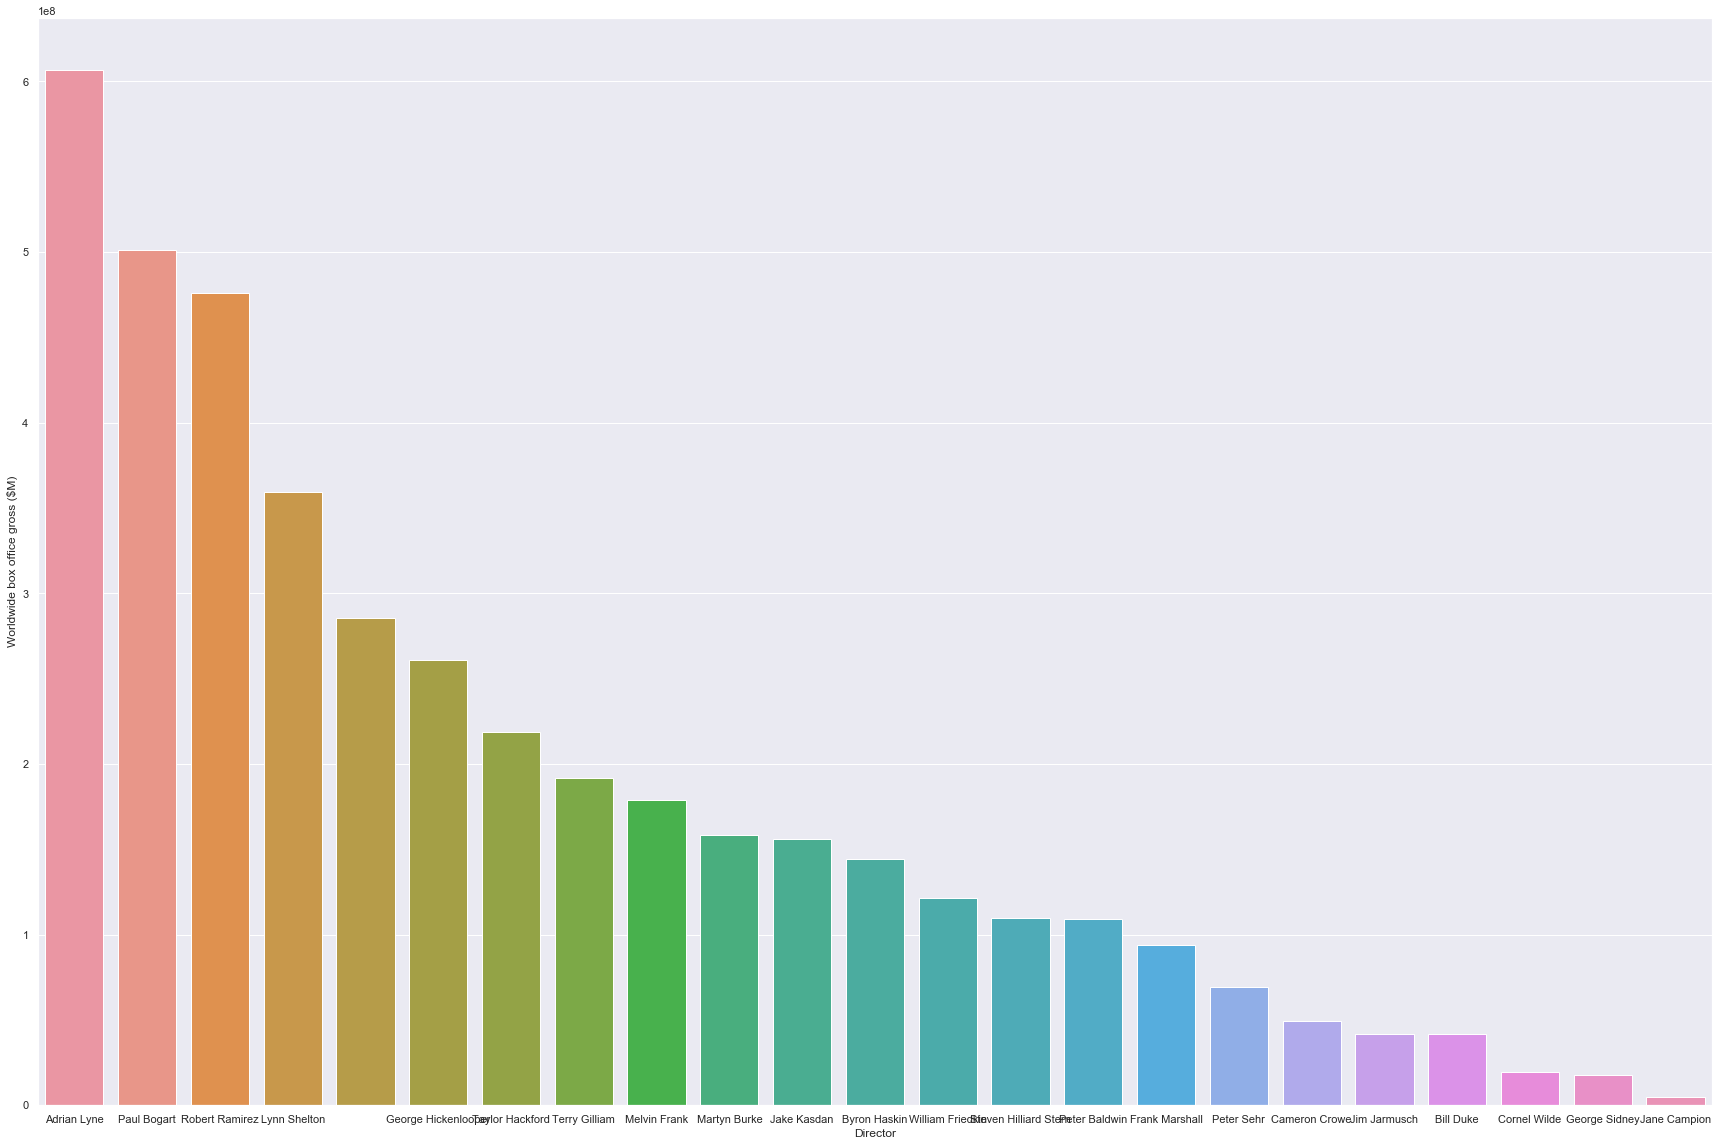

In [167]:
sns.barplot(gross_by_director.index,gross_by_director.worldwide_gross)
sns.set(rc={'figure.figsize':(30,20)})
plt.xlabel('Director')
plt.ylabel('Worldwide box office gross ($M)')

In [ ]:
df['known_for_titles'].str.split(',',n=3,expand=True)

In [ ]:
SELECT *
FROM
    movies.imdb_name_basics
join imdb_title_principals
on imdb_name_basics.nconst = imdb_title_principals.nconst

In [ ]:
SELECT *
FROM imdb_title_principals
JOIN imdb_title_crew
ON imdb_title_principals.tconst = imdb_title_crew.tconst 

In [ ]:
SELECT title,genre,director,writer,production_budget,domestic_gross,worldwide_gross FROM movies.rt_movie_info
join rt_imdb_link
on rt_movie_info.id = rt_imdb_link.rtid
join tn_movie_budgets
on rt_imdb_link.title = tn_movie_budgets.movie

In [215]:
df2=pd.read_sql('''Select primary_name,primary_profession,movie,production_budget,domestic_gross,worldwide_gross
From movies.imdb_title_crew
join imdb_name_basics
on imdb_name_basics.nconst = imdb_title_crew.directors
join imdb_title_basics
on imdb_title_basics.tconst = imdb_title_crew.tconst
join tn_movie_budgets
on imdb_title_basics.primary_title=tn_movie_budgets.movie
where primary_profession like "%director%"''',conn)

In [232]:
type('worldwide_gross')

str

In [238]:
df2['worldwide_gross']=df2['worldwide_gross'].str.replace(',','')
df2['worldwide_gross']=df2['worldwide_gross'].str.replace('$','')
df2['worldwide_gross'] = df2.worldwide_gross.astype(float)

In [300]:
df2['domestic_gross']=df2['domestic_gross'].str.replace(',','')
df2['domestic_gross']=df2['domestic_gross'].str.replace('$','')
df2['domestic_gross'] = df2.domestic_gross.astype(float)

In [301]:
g=df2[['primary_name','worldwide_gross','domestic_gross']]

In [302]:
g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_name     3168 non-null   object 
 1   worldwide_gross  3168 non-null   float64
 2   domestic_gross   3168 non-null   float64
dtypes: float64(2), object(1)
memory usage: 74.4+ KB


In [303]:
gbd = g.groupby('primary_name').sum().sort_values('worldwide_gross',ascending=False).head(20)

In [304]:
gbd

,worldwide_gross,domestic_gross
primary_name,,
Christopher Nolan,3.086180e+09,1.118801e+09
James Wan,3.083488e+09,8.794781e+08
Joss Whedon,2.992085e+09,1.128220e+09
Peter Jackson,2.922948e+09,8.164902e+08
Michael Bay,2.911998e+09,7.778736e+08
Atsushi Wada,2.776345e+09,7.605076e+08
Francis Lawrence,2.543192e+09,1.149112e+09
Zack Snyder,2.420920e+09,9.424978e+08
Bryan Singer,2.383073e+09,6.708550e+08


Text(0.5, 1.0, 'Top 20 Most Successful Directors')

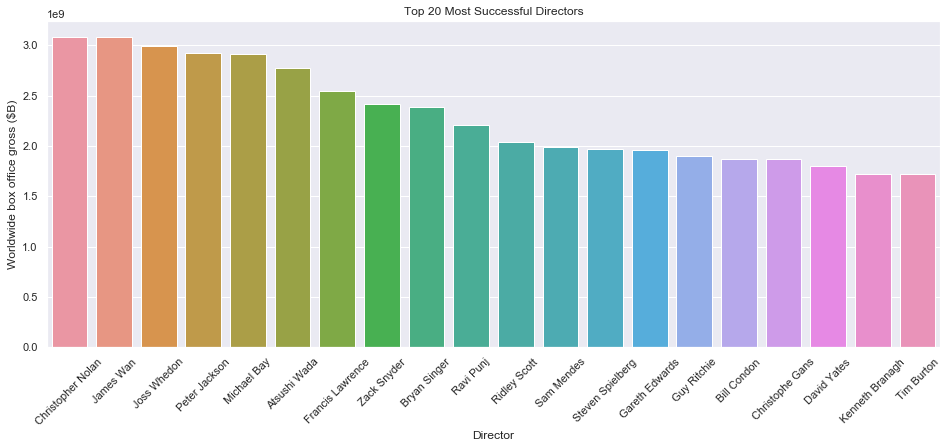

In [309]:
plt.figure(figsize=(16, 6))
sns.barplot(gbd.index,gbd.worldwide_gross)
plt.xlabel('Director')
plt.ylabel('Worldwide box office gross ($B)')
plt.xticks(rotation=45)
plt.title('Top 20 Most Successful Directors')

In [216]:
new = df2['primary_profession'].str.split(',',n=3,expand=True)

In [196]:
df2['Primary Profession'] = new[0] 
df2['Secondary Profession'] = new[1] 
df2['Tertiary Profession'] = new[2] 

In [197]:
df2

,primary_name,primary_profession,movie,production_budget,domestic_gross,worldwide_gross,Profession,Primary Profession,Secondary Profession,Tertiary Profession
0,Atsushi Wada,director,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",director,director,None,None
1,Rob Marshall,"director,miscellaneous,producer",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",director,director,miscellaneous,producer
2,Simon Kinberg,"producer,writer,director",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",producer,producer,writer,director
3,Joss Whedon,"writer,producer,director",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",writer,writer,producer,director
4,Zack Snyder,"producer,director,writer",Justice League,"$300,000,000","$229,024,295","$655,945,209",producer,producer,director,writer
...,...,...,...,...,...,...,...,...,...,...
3462,Graham Wright,"soundtrack,director,actor",Clean,"$10,000","$138,711","$138,711",soundtrack,soundtrack,director,actor
3463,Bill Yip,"assistant_director,producer,actor",Cure,"$10,000","$94,596","$94,596",assistant_director,assistant_director,producer,actor
3464,Ifigeneia Dimitriou,director,Cure,"$10,000","$94,596","$94,596",director,director,None,None
3465,Edward Burns,"actor,writer,producer",Newlyweds,"$9,000","$4,584","$4,584",actor,actor,writer,producer


In [ ]:
_______________________________________________
_______________________________________________

In [312]:
df3=pd.read_sql('''Select primary_name,primary_profession,movie,production_budget,domestic_gross,worldwide_gross
From movies.imdb_title_crew
join imdb_name_basics
on imdb_name_basics.nconst = imdb_title_crew.directors
join imdb_title_basics
on imdb_title_basics.tconst = imdb_title_crew.tconst
join tn_movie_budgets
on imdb_title_basics.primary_title=tn_movie_budgets.movie
where primary_profession like "%actor%"''',conn)

In [318]:
new3 = df3['primary_profession'].str.split(',',n=3,expand=True)

In [341]:
df3['Primary Profession'] = new[0] 
df3['Secondary Profession'] = new[1] 
df3['Tertiary Profession'] = new[2] 

In [342]:
df3

,primary_name,primary_profession,movie,production_budget,domestic_gross,worldwide_gross,Primary Profession,Secondary Profession,Tertiary Profession
0,Ron Howard,"actor,producer,director",Solo: A Star Wars Story,"$275,000,000","$213,767,512",3.931513e+08,director,None,None
1,Andrew Stanton,"writer,actor,producer",John Carter,"$275,000,000","$73,058,679",2.827781e+08,director,miscellaneous,producer
2,F. Gary Gray,"director,actor,producer",The Fate of the Furious,"$250,000,000","$225,764,765",1.234846e+09,producer,writer,director
3,Peter Berg,"producer,actor,writer",Battleship,"$220,000,000","$65,233,400",3.134777e+08,writer,producer,director
4,Michael Bay,"producer,director,actor",Transformers: The Last Knight,"$217,000,000","$130,168,683",6.028933e+08,producer,director,writer
...,...,...,...,...,...,...,...,...,...
748,Jason Trost,"actor,writer,director",All Superheroes Must Die,"$20,000",$0,0.000000e+00,actor,director,writer
749,Brandon Landers,"actor,sound_department,art_department",The Ridges,"$17,300",$0,0.000000e+00,art_director,director,writer
750,Graham Wright,"soundtrack,director,actor",Clean,"$10,000","$138,711",1.387110e+05,writer,producer,director
751,Bill Yip,"assistant_director,producer,actor",Cure,"$10,000","$94,596",9.459600e+04,director,writer,editor


In [322]:
df3['worldwide_gross']=df3['worldwide_gross'].str.replace(',','')
df3['worldwide_gross']=df3['worldwide_gross'].str.replace('$','')
df3['worldwide_gross'] = df3.worldwide_gross.astype(float)

AttributeError: Can only use .str accessor with string values!

In [323]:
a=df3[['primary_name','worldwide_gross','domestic_gross','Primary Profession']]

In [326]:
a

,primary_name,worldwide_gross,domestic_gross,Primary Profession
0,Ron Howard,3.931513e+08,"$213,767,512",director
1,Andrew Stanton,2.827781e+08,"$73,058,679",director
2,F. Gary Gray,1.234846e+09,"$225,764,765",producer
3,Peter Berg,3.134777e+08,"$65,233,400",writer
4,Michael Bay,6.028933e+08,"$130,168,683",producer
...,...,...,...,...
748,Jason Trost,0.000000e+00,$0,actor
749,Brandon Landers,0.000000e+00,$0,art_director
750,Graham Wright,1.387110e+05,"$138,711",writer
751,Bill Yip,9.459600e+04,"$94,596",director


In [338]:
a.loc[a["primary_name"] == 'Ron Howard']

,primary_name,worldwide_gross,domestic_gross,Primary Profession
0,Ron Howard,393151347.0,"$213,767,512",director
57,Ron Howard,89693309.0,"$25,020,758",director
97,Ron Howard,219519367.0,"$34,343,574",director
108,Ron Howard,70546865.0,"$48,475,290",producer
217,Ron Howard,98230839.0,"$26,947,624",director


In [328]:
b= a.loc[a['Primary Profession'] == 'actor']

In [329]:
b

,primary_name,worldwide_gross,domestic_gross,Primary Profession
7,Thiago J. Silva,550517357.0,"$218,080,025",actor
53,Chris Wedge,262794441.0,"$107,518,682",actor
54,Simon West,311979256.0,"$85,028,192",actor
65,George Anton,498438212.0,"$209,028,679",actor
83,Martin Scorsese,299461782.0,"$128,012,934",actor
...,...,...,...,...
701,Ti West,1011535.0,"$78,396",actor
703,Eddie Nilsson,450.0,$0,actor
714,Ruby Klein,44793168.0,"$15,433",actor
734,Cezary Pazura,1577585.0,"$484,592",actor


In [333]:
gba = b.groupby('primary_name').sum().sort_values('worldwide_gross',ascending=False).head(20)

In [334]:
gba

,worldwide_gross
primary_name,
Thiago J. Silva,550517357.0
George Anton,498438212.0
James Foley,371350619.0
David Fincher,368567189.0
Clint Eastwood,347184826.0
Simon West,311979256.0
Martin Scorsese,299461782.0
Sébastien Lifshitz,268000000.0
Chris Wedge,262794441.0


In [364]:
df4 = pd.read_sql("""SELECT primary_name,worldwide_gross FROM movies.imdb_name_basics
join imdb_title_principals
on imdb_name_basics.nconst = imdb_title_principals.nconst
join imdb_title_basics
on imdb_title_basics.tconst = imdb_title_principals.tconst
join tn_movie_budgets
on imdb_title_basics.primary_title=tn_movie_budgets.movie
where category = 'actor'""", conn)

In [365]:
df4

,primary_name,worldwide_gross
0,Johnny Depp,"$1,045,663,875"
1,Ian McShane,"$1,045,663,875"
2,Geoffrey Rush,"$1,045,663,875"
3,James McAvoy,"$149,762,350"
4,Michael Fassbender,"$149,762,350"
...,...,...
8609,Carlos Gallardo,$0
8610,Roby Attal,$0
8611,Pierce Bailey,$0
8612,David Chandler,$0


In [367]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8614 entries, 0 to 8613
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   primary_name     8614 non-null   object
 1   worldwide_gross  8614 non-null   object
dtypes: object(2)
memory usage: 134.7+ KB


In [368]:
df4['worldwide_gross']=df4['worldwide_gross'].str.replace(',','')
df4['worldwide_gross']=df4['worldwide_gross'].str.replace('$','')
df4['worldwide_gross'] = df4.worldwide_gross.astype(float)

In [375]:
actors = df4.groupby('primary_name').sum().sort_values('worldwide_gross', ascending=False).head(25)

In [393]:
def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

Text(0.5, 1.0, 'Top 25 Most Successful Actors')

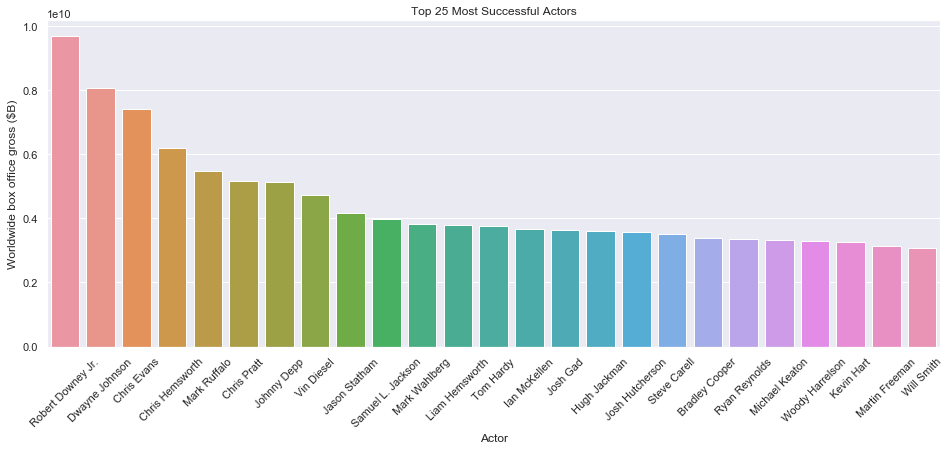

In [397]:
plt.figure(figsize=(16, 6))
sns.barplot(actors.index,actors.worldwide_gross)
plt.xlabel('Actor')
plt.ylabel('Worldwide box office gross ($B)')
plt.xticks(rotation=45)
plt.title('Top 25 Most Successful Actors')